In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy  
%load_ext autoreload
%autoreload 2

from solve_consumption_saving import *
from Model import ReferenceDependenceClass

In [2]:
model = ReferenceDependenceClass()
model1 = deepcopy(model)

In [3]:
model.par.euler = True
model1.par.euler = False
model.par.model = 'ConSav'
model1.par.model = 'ConSav'

In [4]:
value_function_employment_ConSav(model.par, model.sol)

In [5]:
value_function_employment_ConSav(model1.par, model1.sol)

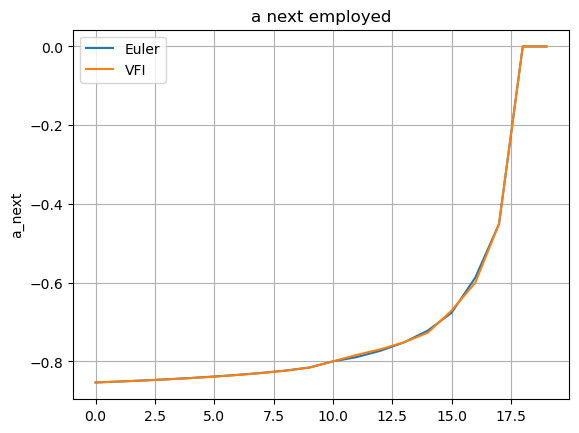

In [6]:
plt.plot(model.sol.a_next_e[20,:,0], label='Euler')
plt.plot(model1.sol.a_next_e[20,:,0], label='VFI')
plt.ylabel('a_next')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

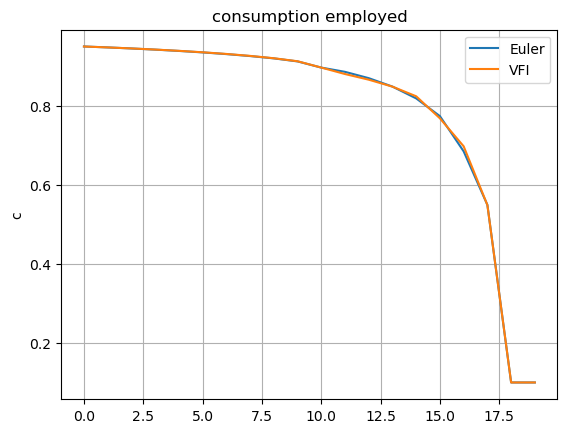

In [7]:
plt.plot(model.sol.c_e[4,:,0], label='Euler')
plt.plot(model1.sol.c_e[4,:,0], label='VFI')
plt.ylabel('c')
plt.title('consumption employed')
plt.legend()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

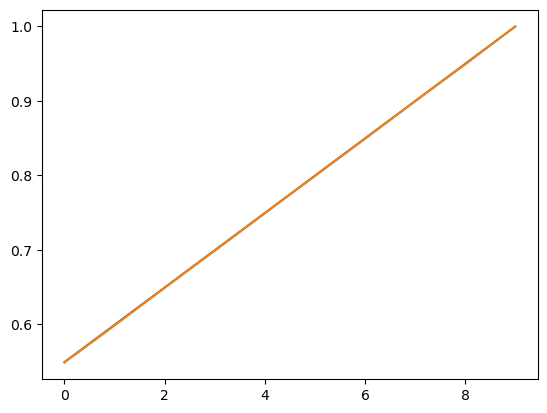

In [8]:
plt.plot(model.sol.c_e[-1,-3,:], label='euler')
plt.plot(model1.sol.c_e[-1,-3,:], label='no euler')
plt.legend

In [9]:
print(model.par.V_e[10,:,0])

[  -0.92741191   -0.92860428   -0.92992536   -0.93139732   -0.933048
   -0.93491284   -0.93703791   -0.9394847    -0.94233852   -0.945726
   -0.94986731   -0.95765334   -0.96726425   -0.97942324   -0.99540902
   -1.02317307   -1.07244708   -1.20099349   -2.30258509 -460.5170186 ]


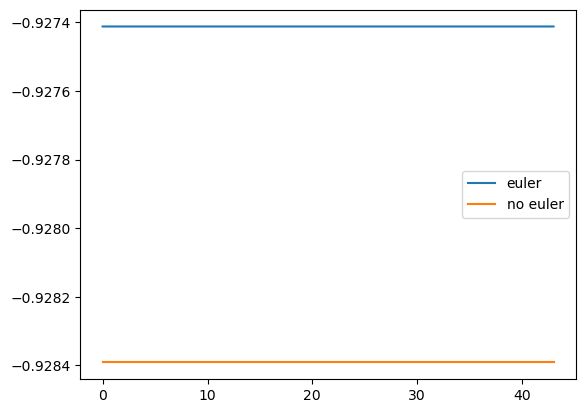

In [10]:
plt.plot(model.par.V_e[:, 0, 0], label='euler')
plt.plot(model1.par.V_e[:, 0, 0], label='no euler')
plt.legend()

In [11]:
s, V_u = unemployment_ss_ConSav(model.par, -1, 0, 0)
print(V_u, s)

-100.47218085470904 0.2760337536433561


In [12]:
s, V_u = unemployment_ss_ConSav(model1.par, -1, 0, 0)
print(V_u, s)

-100.4731427892572 0.27603297050198766


In [13]:
solve_search_and_consumption_ConSav(model.par, model.sol)

In [14]:
solve_search_and_consumption_ConSav(model1.par, model1.sol)

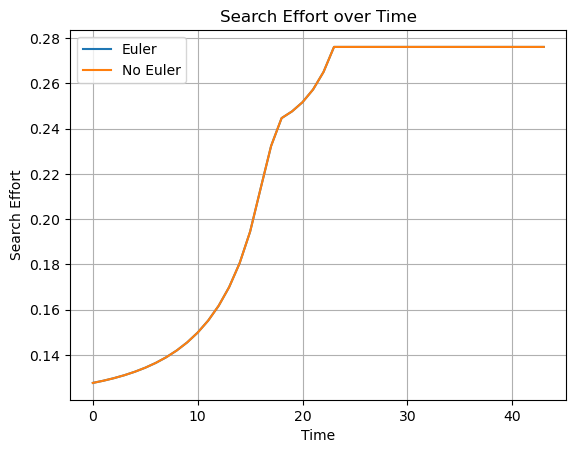

In [15]:

plt.plot(model.sol.s[0,:model.par.T,0], label='Euler')
plt.plot(model1.sol.s[0,:model.par.T,0], label='No Euler')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
model.solve_ConSav()

array([0.11008733, 0.11476183, 0.11948518, 0.12390906, 0.12850404,
       0.13327439, 0.1362769 , 0.13896829, 0.14198942, 0.14557542,
       0.14990585, 0.15519689, 0.16174548, 0.16998031, 0.1805474 ,
       0.194472  , 0.21349252, 0.23228189, 0.24410332, 0.24756475,
       0.25164323, 0.25721516, 0.26497855, 0.27603496, 0.27603553,
       0.27603555, 0.27603555, 0.27603555, 0.27603554, 0.27603554,
       0.27603553, 0.27603551, 0.2760355 , 0.27603547, 0.27603544])

In [17]:
model1.solve_ConSav()

array([0.11008668, 0.11476134, 0.1194846 , 0.12390836, 0.12850326,
       0.13327356, 0.13627618, 0.1389676 , 0.14198874, 0.14557475,
       0.14990519, 0.15519624, 0.16174484, 0.16997967, 0.18054675,
       0.19447133, 0.21349181, 0.23228112, 0.2441025 , 0.24756398,
       0.25164247, 0.25721439, 0.26497777, 0.27603415, 0.27603472,
       0.27603474, 0.27603474, 0.27603474, 0.27603473, 0.27603473,
       0.27603472, 0.2760347 , 0.27603469, 0.27603466, 0.27603463])

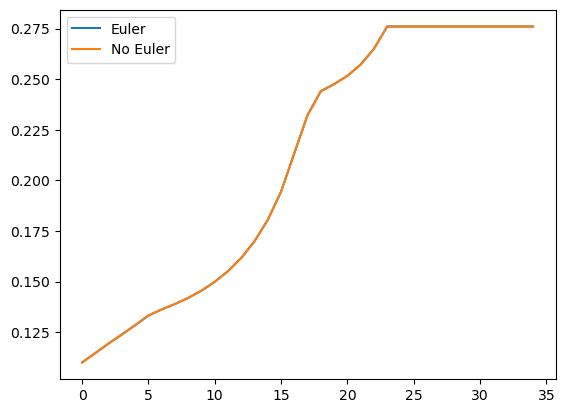

In [18]:
sim = model.sim.s_total
sim1 = model1.sim.s_total

plt.plot(sim, label='Euler')
plt.plot(sim1, label = 'No Euler')
plt.legend()

In [19]:
solve_forward_employment_ConSav(0, model.par, model.sol, model.sim)
solve_forward_employment_ConSav(0, model1.par, model1.sol, model1.sim)

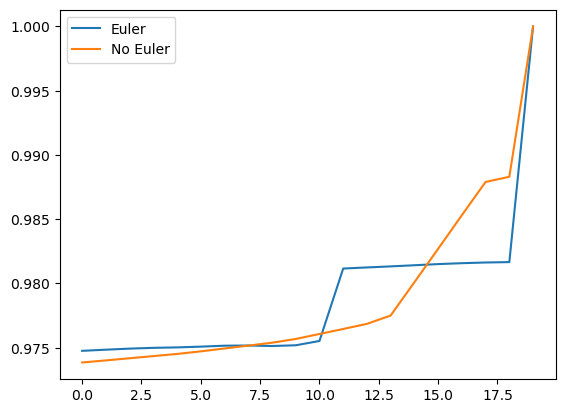

In [20]:
plt.plot(model.sim.c_e[2,:], label='Euler')
plt.plot(model1.sim.c_e[2,:], label='No Euler')
plt.legend()

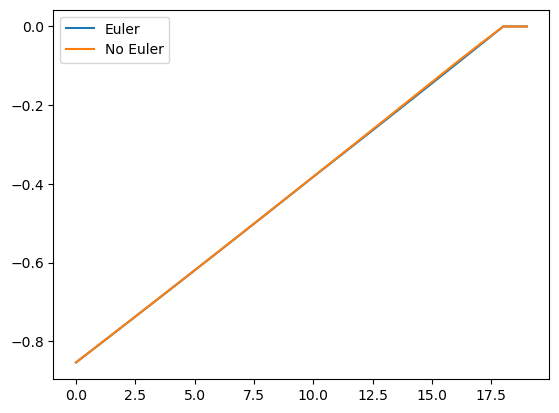

In [21]:
plt.plot(model.sim.a_e[-1,:], label='Euler')
plt.plot(model1.sim.a_e[-1,:], label='No Euler')
plt.legend()